# **EE488 Machine Learning Basics and Practices**
## **Mini-Assignment 2**

## **Part 1.** Implement DBSCAN algorithm using Numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs

## Step 1: Implement DBSCAN from skeleton code

## **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report.



In [ ]:
class DBSCAN:

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit_predict(self, X):
        '''
        parameter:
        X: data
        shape of X: (number of sample, feature dimensions)

        It returns a array of cluster labels for each sample point. 
        Here, the cluster labels are numbered starting from 1. 
        Moreover, "-1" means noise.
        '''
        self.X = X
        self.cluster_labels = np.zeros((len(X)))              # For all sample points, initialize the cluster label as 0
        self.current_label = 0
        self.labeled_indices = set()                          # for tracking all visited (already labeled) points
        self.core_sample_indices_ = []                        # for tracking all core samples (just for future visualization)

        # declare something if you think you need ------------


        # ----------------------------------------------------

        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among points that are not visited so far (fill the blanks for "pick_arbitrary_point" below)
            if self.is_core_sample(p_idx):                    # check if it is core sample (fill the blanks for "is_core_sample" below)
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession (fill the blanks for "visit_all_successive_neighbors" below) 
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place

        return self.cluster_labels

    def pick_arbitrary_point(self):
        '''
        Pick arbitrary point among points that are not visited so far (for next successive visiting).
        It returns an "index" of point("p_idx"), not a data point itself.
        '''
        # fill in the blank --------------------------------------
        indices = np.where(self.cluster_labels == 0)
        p_idx = np.random.choice(indices[0], 1)[0]
        # --------------------------------------------------------
        assert self.cluster_labels[p_idx] == 0  # sanity check
        return p_idx

    def is_core_sample(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Check whether the "p_idx" is a core sample or not.
        If it is, return True. Otherwise, return False.
        You can use "get_neighbors" method, which is defined below.
        You can define a core sample that has greater than or equal to min_samples points in its neighbor, where the point itself is also included in its neighbor.
        '''
        # fill in the blank --------------------------------------

        neighbers = self.get_neighbors(p_idx)
        if len(neighbers) >= self.min_samples:
          return True
        else:
          return False
        # --------------------------------------------------------

    def visit_all_successive_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Visit all the neighbors of "p_idx" as well as the neighbors of all the visited points if they are the core points themselves.
        Assign current cluster label everytime you visited. But you don't need to relabel them if they are already allocated to a specific cluster.
        It returns nothing but modifies "self.cluster_labels" in-place when labeling.
        '''   
        all_neighbors_indices = {p_idx}
        while all_neighbors_indices:
          
        # fill in the blank --------------------------------------
          index = all_neighbors_indices.pop()
          if index not in self.labeled_indices:
            self.cluster_labels[index] = self.current_label
            self.labeled_indices.add(index)
            neighbors = self.get_neighbors(index)
            if len(neighbors) >= self.min_samples:
              self.core_sample_indices_.append(index)
              all_neighbors_indices = all_neighbors_indices | neighbors
        # --------------------------------------------------------

    def get_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        It returns a "set of indices" of neighbors of "p_idx" point.
        l2 norm will be considered for computing distances.
        '''
        # fill in the blank --------------------------------------
        neighbors = set()
        point = self.X[p_idx]
        for i in range(0,len(X)):
          if np.linalg.norm(self.X[i]-point,2) < self.eps:
            neighbors.add(i)
        return neighbors
        # --------------------------------------------------------


## Step 2: Clusterting with two different datasets

## **TODO** : Try three different (eps, MinPts) combinations(depeding on your choice) for each dataset and attach the results in the report. Describe how the results change with varying eps and MinPts.

Estimated number of clusters: 2
Estimated number of noise points: 11


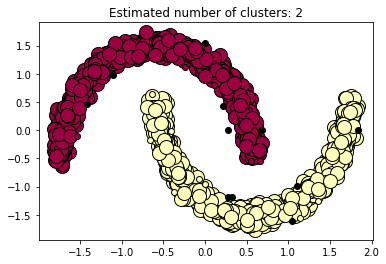

In [ ]:
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05, random_state=0)
X, labels_true = noisy_moons

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=0.1, min_samples=3)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 186


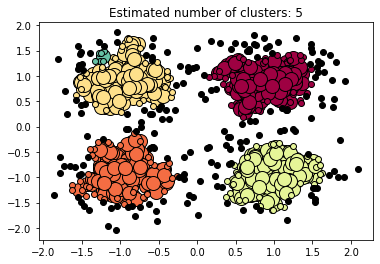

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=0.15, min_samples=8)     ## Try different eps and min_samples values by yourself
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## **TODO** : Please answer the following questions (cleary write down your own explanation on your answer to get a full credit)

### **Q1.** What is the main difference between noise and border point?
### **Q2.** Let us slightly modify the algorithm (in `fit_predict` method) as follows:

### From
```python
        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among not-visited points
            if self.is_core_sample(p_idx):                    # check if it is core sample
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place

        return self.cluster_labels
```
### to 
```python
        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among not-visited points
            if self.is_core_sample(p_idx):                    # check if it is core sample
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place
                self.labeled_indices.add(p_idx)               # mark it as labeled point (Hence, you don't relabel this point again later)

        return self.cluster_labels
```
### Then, what is the possible range of number of noise samples after the clustering is completed? **(write down in general form and express it using the number of differnt types of points(e.g. core, noise) which are assumed to be obtained in orignal DBSCAN.  The modified version run with the same and fixed eps, MinPts that the original one used)**

Visualization Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html


# **Part 2.** Implement the Batchnormalization Layer in Deep Neural Network

## Objective
1. Implementing the batchnormalization layer that can be used like ```nn.BatchNorm1d()``` module
2. Understading how to introduce and apply the learnable rescaling and reshifting parameters to the normlized input
3. Comparing the difference between the results with and without the batchnormalization layer




In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import SubsetRandomSampler

from PIL import Image
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import copy
import os
import numpy as np 
import random
import time 

torch.backends.cudnn.deterministic = True # Use cudnn as deterministic mode for reproducibility
torch.backends.cudnn.benchmark = False




## Step1: Load CIFAR-10
- Load **CIFAR-10** dataset using `torchvision` package
- For training data, we utilize appropriate **data augmentation** and **data preprocessing**
  - We utilize **Random Crop** and **Random Horizontal Filp** for data augmentation
  - Data is preprocessed by **normalizing** the data using the mean (0.4914, 0.4822, 0.4465 for each of RGB channel, respectively) and standard deviation (0.2023, 0.1994, 0.2010 for each of RGB channel, respectively) computed from training set of CIFAR-10.
- For test data, we utilize only **data preprocessing**, not **data augmentation**



In [ ]:
transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4), # Random Crop: Randomly crop the part of the large image and utilize it as an augmented data 
        transforms.RandomHorizontalFlip(), # Random Horizontal Flip: Randomly flip the image and utilize it as an augmented data
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023,0.1994,0.2010]), # Normalize the data using the given mean and standard deviation
        ])

#Apply data preprocessing for test set
transform_test = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023,0.1994,0.2010]),
        ]) 

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# load cifar10 with only 0~3 classes
train_indices, = torch.where(torch.tensor(train_dataset.targets) <= 3)
test_indices, = torch.where(torch.tensor(test_dataset.targets) <= 3)

train_loader = torch.utils.data.DataLoader(train_dataset, sampler=SubsetRandomSampler(train_indices), batch_size=256) 
test_loader = torch.utils.data.DataLoader(test_dataset, sampler=SubsetRandomSampler(test_indices), batch_size=256)  


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


- Implement `reset_seed` function for reproducibility
  - `reset_seed` function sets the random seed for `torch`, `numpy` and `random` pacakges.

In [ ]:
def reset_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

## Step2: Run DNN(Deep Neural Network) model without Batchnorm.


- Run the experiment without batchnorm for the baseline.


## **TODO** : Fill in the blanks of the codes in step 2 and write your own description of the source code in your report. (You can refer to the practice session material for a few blanks)



**Step2-1**: Implement DNN model **with six fully-connected layers(i.e. five hidden layers)**

### **In ```forward()``` method, all fully-connected layers must be followed by ReLU activation except for the last layer** (Use ```F.relu``` function)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DNN(nn.Module):

    def __init__(self):

        super(DNN, self).__init__()
        # torch.nn.Linear(size of each input sample, size of each output sample)
        self.fc1 = nn.Linear(3072, 1800) # Input size should be 3072 (32*32*3) and output size is the size of first hidden layer(your design parameter).
        self.fc2 = nn.Linear(1800, 1200) # Input size should be the size of first hidden layer and output size is the size of second hidden layer(your design parameter).
        self.fc3 = nn.Linear(1200, 1200)
        self.fc4 = nn.Linear(1200, 640)
        self.fc5 = nn.Linear(640, 320) 
        self.fc6 = nn.Linear(320, 4) # Input size should be the size of the previous layer and output size should be 4 (the number of classes).

    def forward(self, x):

        # fill in the blank --------------------------------------
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        # --------------------------------------------------------

        return x

**Step2-2**: Implement `train` function for training (see step 2-4 below to see how we are going to use train function) 

In [ ]:
def train(model, data_loader, criterion, optimizer, n_epoch):
    model.train()
    for epoch in range(n_epoch):
        running_loss = 0
        for i, (images, labels) in enumerate(data_loader):
            images, labels = images.cuda(), labels.cuda()
            # fill in the blank --------------------------------------
            optimizer.zero_grad() # clear out the gradients to avoid accumulating with the gradients computed in previous step. 
            outputs = model(images) # 1) Proceed forward pass
            loss = criterion(outputs, labels) # 2) Compute the loss by comparing the predictive outputs and the actual labels
            running_loss += loss
            loss.backward() # 3) Compute a gradient of a loss function by backpropagation
            optimizer.step()
            # --------------------------------------------------------
        print(len(data_loader))
        print('Epoch {}, loss = {:.3f}'.format(epoch + 1, running_loss/len(data_loader)))

**Step2-3**: Implement `eval` function for evaluation 

In [ ]:
def eval(model, data_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.cuda(), labels.cuda()
            # fill in the blank --------------------------------------
            outputs = model(images) # Obtain the outputs from model
            _, predicts = torch.max(outputs.data , 1) # Make a prediction 
            total += labels.size(0)
            correct += (predicts==labels).sum().item() # Compute the number of correct predictions
            # --------------------------------------------------------
        accuracy = 100 * correct / total
        
    print('Test Accuracy: {}%'.format(accuracy))

**Step2-4**: Train the defined DNN model using `train` function.

In [ ]:
reset_seed(2021)
criterion = nn.CrossEntropyLoss()
dnn_model = DNN().to("cuda")
optimizer = optim.Adam(params=dnn_model.parameters())

train(dnn_model, train_loader, criterion, optimizer, n_epoch=20)

79
Epoch 1, loss = 1.097


KeyboardInterrupt: ignored

**Step2-5**: Check the result (We will compare it with later result)


In [ ]:
eval(dnn_model, test_loader)

Test Accuracy: 68.05%


## Step 3: Implement MyBacthNorm1d() class inheriting nn.Module

When you implement the batchnorm layer in this project, you can inherit the ```nn.Module``` to leave the complicated backward calculations to autograd in pytorch and focus only on implementing the pseudocode of the algorithm in lecture note. In other words, you only need to implement the forward pass of batchnorm layer here. The followings are required to do:

- Consider the moving averages of minibatch mean and variance for inference time handling

- Compute moving averages using  **exponential moving average*** 

- Consider the case of training and inference seperately (using ```self.training``` attribute in ```nn.Module```)

- $\alpha$ for exponential moving averaging should set to be 0.1 (see wikipedia below)

- Implement it so that it can be used like:

```python
self.norm_layer1 = MyBatchNorm1d(output_num_neuron)
```

- **Initialize $\gamma$ as 1's**

- **Initialize $\beta$ as 0's**

*see https://en.wikipedia.org/wiki/Moving_average

## **TODO** : Fill in the blanks of the codes in step 3 and write your own description of the source code in your report. (You can refer to the practice session material for a few blanks)

In [ ]:
class MyBatchNorm1d(nn.Module):
    def __init__(self, num_features):
        super(MyBatchNorm1d, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features)) # register the tensor as a parameter in this module (be treated like module's parameter -> can be learned via optimizer altogether)
        self.beta = nn.Parameter(torch.zeros(num_features)) 
        
        # fill in the blank --------------------------------------
        self.t = 1
        self.mean = nn.Parameter(torch.zeros(num_features))
        self.var = nn.Parameter(torch.zeros(num_features))
        # --------------------------------------------------------
        
    def forward(self, input):
        
        # fill in the blank --------------------------------------
        if self.training:               # set to be True automatically when 'model.train()' is called
          if self.t == 1:
            self.mean = nn.Parameter(torch.mean(input, axis = 0))
            self.var = nn.Parameter(torch.var(input, axis = 0))
          else:
            self.mean = nn.Parameter(0.1 * torch.mean(input,axis = 0) + 0.9 * self.mean)
            self.var = nn.Parameter(0.1 * torch.var(input,axis = 0) + 0.9 * self.var)
          self.t = self.t + 1
          std = torch.sqrt(torch.var(input,axis = 0))
          x_norm = (input-torch.mean(input,axis = 0))/std
          output = self.gamma * x_norm + self.beta
        else:                           # if the 'model.eval()' was called
          x_norm = (input-self.mean)/torch.sqrt(self.var)
          output = self.gamma * x_norm + self.beta
        # --------------------------------------------------------
        return output



## Step4: Implement DNN with MyBatchNorm1d()
We will add MyBatchNorm1d() layer that you made above to DNN model.
### **Apply BatchNormalization between fully-connected layer and activation.**
- DNN have five hidden fully-connected layers, so you need five batchnorm layers.

## **TODO1** : Fill in the blanks of the codes in step 4 and write your own description of the source code in your report. (You can refer to the practice session material for a few blanks)

## **TODO2** : Attach and compare the results of step 2-5 and step 4-3 in your report.

**Step4-1**: Implement `DNN_BatchNorm`

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DNN_BatchNorm(nn.Module):

    def __init__(self):

        super(DNN_BatchNorm, self).__init__()
        # torch.nn.Linear(size of each input sample, size of each output sample)
        self.fc1 = nn.Linear(3072, 1800) # Input size should be 3072 (32*32*3) and output size is the size of first hidden layer(your design parameter).
        self.norm1 = MyBatchNorm1d(num_features=1800)
        self.fc2 = nn.Linear(1800, 1200) # Input size should be the size of first hidden layer and output size is the size of second hidden layer(your design parameter).
        self.norm2 = MyBatchNorm1d(num_features=1200)
        self.fc3 = nn.Linear(1200, 1200)
        self.norm3 = MyBatchNorm1d(num_features=1200)
        self.fc4 = nn.Linear(1200, 640)
        self.norm4 = MyBatchNorm1d(num_features=640)
        self.fc5 = nn.Linear(640, 320) 
        self.norm5 = MyBatchNorm1d(num_features=320)
        self.fc6 = nn.Linear(320, 4) # Input size should be the size of the previous layer and output size should be 4 (the number of classes).

    def forward(self, x):

        # fill in the blank --------------------------------------
        x = x.view(-1, 32*32*3)
        x = F.relu(self.norm1(self.fc1(x)))
        x = F.relu(self.norm2(self.fc2(x)))
        x = F.relu(self.norm3(self.fc3(x)))
        x = F.relu(self.norm4(self.fc4(x)))
        x = F.relu(self.norm5(self.fc5(x)))
        x = self.fc6(x)

        # --------------------------------------------------------

        return x

**Step4-2**: Train the defined `DNN_BatchNorm` model using `train` function.

In [ ]:
reset_seed(2021)
criterion = nn.CrossEntropyLoss()
dnn_batchnorm_model = DNN_BatchNorm().to("cuda")
optimizer = optim.Adam(params=dnn_batchnorm_model.parameters())

train(dnn_batchnorm_model, train_loader, criterion, optimizer, n_epoch=20)

Epoch 1, loss = 1.010
Epoch 2, loss = 0.884
Epoch 3, loss = 0.837
Epoch 4, loss = 0.808
Epoch 5, loss = 0.787
Epoch 6, loss = 0.770
Epoch 7, loss = 0.751
Epoch 8, loss = 0.736
Epoch 9, loss = 0.715
Epoch 10, loss = 0.714
Epoch 11, loss = 0.703
Epoch 12, loss = 0.699
Epoch 13, loss = 0.685
Epoch 14, loss = 0.681
Epoch 15, loss = 0.668
Epoch 16, loss = 0.660
Epoch 17, loss = 0.664
Epoch 18, loss = 0.646
Epoch 19, loss = 0.638
Epoch 20, loss = 0.624


**Step4-3**: Check the result



In [ ]:
eval(dnn_batchnorm_model, test_loader)

Test Accuracy: 74.375%
